In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
import scipy.stats as stats
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#for plotting graphs
%matplotlib inline

In [4]:
#Loading Properties and Train Data Set
df_properties = pd.read_csv("../properties_2016.csv/properties_2016.csv")
df_train = pd.read_csv("../train_2016_v2.csv/train_2016_v2.csv")

/home/vaibhav/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Merging the two dataframe to contain only records having logerror value available
df_merge = pd.merge(df_properties, df_train, on='parcelid', how='right')

In [6]:
#Removing Columns and Rows whos entire record is Nan
df_merge_filtered_cols = df_merge.dropna(axis=1, how='all')
column = df_merge_filtered_cols.columns.difference(['parcelid', 'logerror', 'transactiondate'])
subset_cols = list(column.values)
df_merge_filtered_rows = df_merge_filtered_cols.dropna(axis=0, how='all', subset=subset_cols)

In [7]:
df_merge_filtered_rows.shape

(90275, 60)

In [8]:
#Writing to csv file
df_merge_filtered_rows.to_csv("df_merge_filtered.csv", index=False)

# Question 1

In [11]:
#Checking null enteries and the columns
print(df_merge_filtered_rows.isnull().sum())

parcelid                            0
airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fips                                0
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
latitude                            0
longitude                           0
lotsizesquar

In [12]:
#Finding Correlation of different features with the logerror
delete_cols = []
for i in df_merge_filtered_rows.columns:
    if(df_merge_filtered_rows[i].dtype != np.float64 and df_merge_filtered_rows[i].dtype != np.int64):
        delete_cols.append(i)
df_merge_filtered_cols_with_drop_obj_type = df_merge_filtered_rows.drop(delete_cols, axis=1)

filter_column = df_merge_filtered_cols_with_drop_obj_type.columns.difference(['parcelid', 'fireplaceflag', 'logerror', 'transactiondate'])
col_list  = list(filter_column.values)
for i in col_list:
    cols = []
    log_cols = []
    for index, row in df_merge_filtered_cols_with_drop_obj_type.iterrows():
        if(np.isnan(row[i]) == False):
            cols.append(row[i])
            log_cols.append(row['logerror'])
    x = np.array(cols)
    y = np.array(log_cols)
    r_row, p_value = pearsonr(x, y)
    print("col1 is: ", i , " and col2 is: logerror and r_row is: " , r_row , " and p_value is: " , p_value)

col1 is:  airconditioningtypeid  and col2 is: logerror and r_row is:  0.00517889390701  and p_value is:  0.379637064329
col1 is:  architecturalstyletypeid  and col2 is: logerror and r_row is:  -0.00427593242783  and p_value is:  0.945189777772


/home/vaibhav/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


col1 is:  assessmentyear  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  basementsqft  and col2 is: logerror and r_row is:  0.253394675923  and p_value is:  0.101101033187
col1 is:  bathroomcnt  and col2 is: logerror and r_row is:  0.0278892865508  and p_value is:  5.2447414069e-17
col1 is:  bedroomcnt  and col2 is: logerror and r_row is:  0.025467090071  and p_value is:  1.96457453213e-14
col1 is:  buildingclasstypeid  and col2 is: logerror and r_row is:  nan  and p_value is:  1.0
col1 is:  buildingqualitytypeid  and col2 is: logerror and r_row is:  -0.00957301808937  and p_value is:  0.0218586381646
col1 is:  calculatedbathnbr  and col2 is: logerror and r_row is:  0.0294476853167  and p_value is:  1.47627650281e-18
col1 is:  calculatedfinishedsquarefeet  and col2 is: logerror and r_row is:  0.0387840689218  and p_value is:  3.48019084774e-31
col1 is:  censustractandblock  and col2 is: logerror and r_row is:  0.00889216319796  and p_value is:  0.0077500528463

In [13]:
#Creating dataframe for interesting features
df_interesting_features = df_merge_filtered_cols_with_drop_obj_type[['logerror', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'garagecarcnt', 'lotsizesquarefeet', 'numberofstories', 'yearbuilt', 'unitcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'roomcnt', 'fullbathcnt']]

In [11]:
#Calculating and showing Correlation table for interesting features
df_interesting_features_corr = df_interesting_features.corr()
df_interesting_features_corr

,logerror,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,finishedsquarefeet12,garagecarcnt,lotsizesquarefeet,numberofstories,yearbuilt,unitcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxvaluedollarcnt,roomcnt,fullbathcnt
logerror,1.000000,0.027889,0.025467,-0.009573,0.038784,0.041922,0.026531,0.004835,0.013075,0.017312,-0.003983,0.022085,-0.003051,0.006508,0.005760,0.028845
bathroomcnt,0.027889,1.000000,0.646120,-0.259748,0.772553,0.799372,0.502429,-0.000197,0.320834,0.368061,0.119038,0.586641,0.353806,0.476363,0.044461,0.984130
bedroomcnt,0.025467,0.646120,1.000000,-0.025736,0.632035,0.657599,0.432115,-0.113984,0.150591,0.040871,0.180838,0.305405,0.173205,0.241329,0.164484,0.613753
buildingqualitytypeid,-0.009573,-0.259748,-0.025736,1.000000,-0.158691,-0.196411,NaN,-0.086515,0.388514,-0.424891,0.079702,-0.105382,-0.011348,-0.046708,0.009742,-0.259258
calculatedfinishedsquarefeet,0.038784,0.772553,0.632035,-0.158691,1.000000,1.000000,0.506166,-0.048770,0.346964,0.211641,0.146178,0.716489,0.458550,0.600018,0.098244,0.780325
finishedsquarefeet12,0.041922,0.799372,0.657599,-0.196411,1.000000,1.000000,0.553059,-0.046706,0.341128,0.258530,0.003358,0.744048,0.480463,0.626052,0.120312,0.782956
garagecarcnt,0.026531,0.502429,0.432115,NaN,0.506166,0.553059,1.000000,0.231269,0.107244,0.196209,-0.182243,0.473109,0.250369,0.363972,0.172469,0.454865
lotsizesquarefeet,0.004835,-0.000197,-0.113984,-0.086515,-0.048770,-0.046706,0.231269,1.000000,-0.005338,0.118078,-0.028587,0.008655,-0.034030,-0.021347,-0.084953,0.013917
numberofstories,0.013075,0.320834,0.150591,0.388514,0.346964,0.341128,0.107244,-0.005338,1.000000,0.331381,0.306778,0.222953,0.087028,0.141014,0.243198,0.249112
yearbuilt,0.017312,0.368061,0.040871,-0.424891,0.211641,0.258530,0.196209,0.118078,0.331381,1.000000,-0.100207,0.299696,0.039493,0.140940,0.078065,0.322535


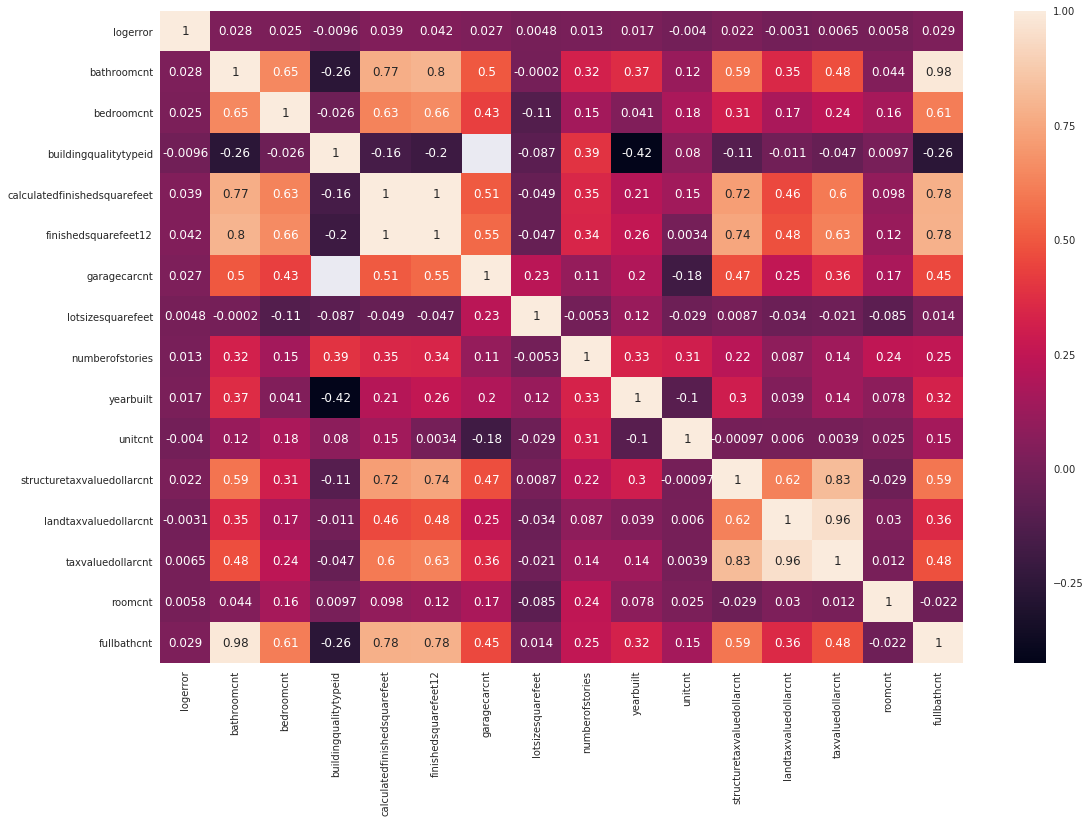

In [12]:
# HeatMap for Interesting Features
sns.set()
plt.figure(figsize=(18, 12))
heatmap_interesting_features = sns.heatmap(df_interesting_features_corr, annot=True)

# Analysis from Heat-Map on Interesting Features

  - Most Positive Correlation (i.e. 1) is between "calculatedfinishedsquarefeet" and "finishedsquarefeet12"

  - Most Negative Correlation (i.e. -0.42) is between "yearbuilt" and "buildingqualitytypeid"

# Question 2

# 2.1 Normal Distribution - logerror

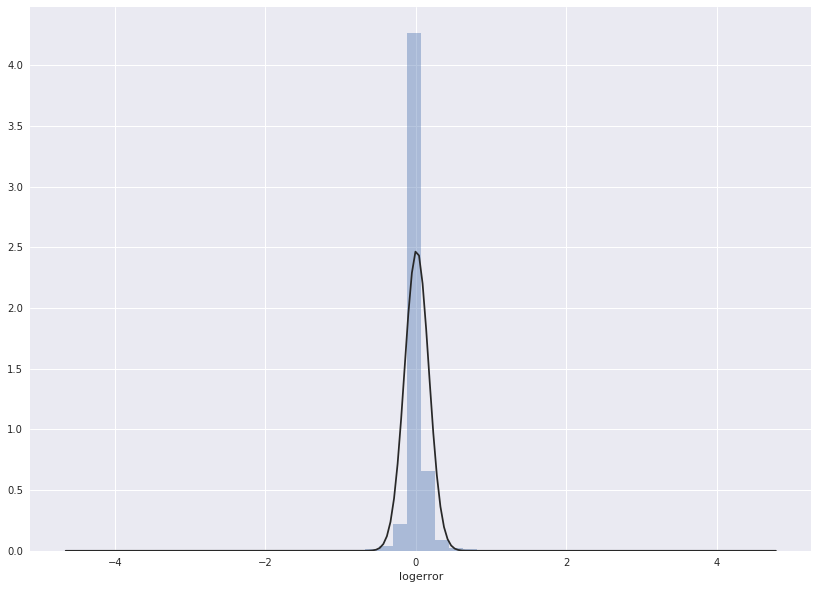

In [13]:
from scipy.stats import norm
sns.set()
plt.figure(figsize=(14, 10))
sns.distplot(df_merge_filtered_rows['logerror'],fit=norm, kde=False)

# Observation

From the above plot, it is clear that all of the values of logerror are in a symmetrical fashion, and most of the results are situated around 0. Based on above plot, the probability that logerror will move between the 0 and three standard deviations [either positive or negative] is approximately 99.97% and the probability that logerror goes beyond three standard deviations is 0.03%. This indicate that the prediction by the estimation model is good.

# 2.2 Line Chart - yearbuilt vs logerror[mean]

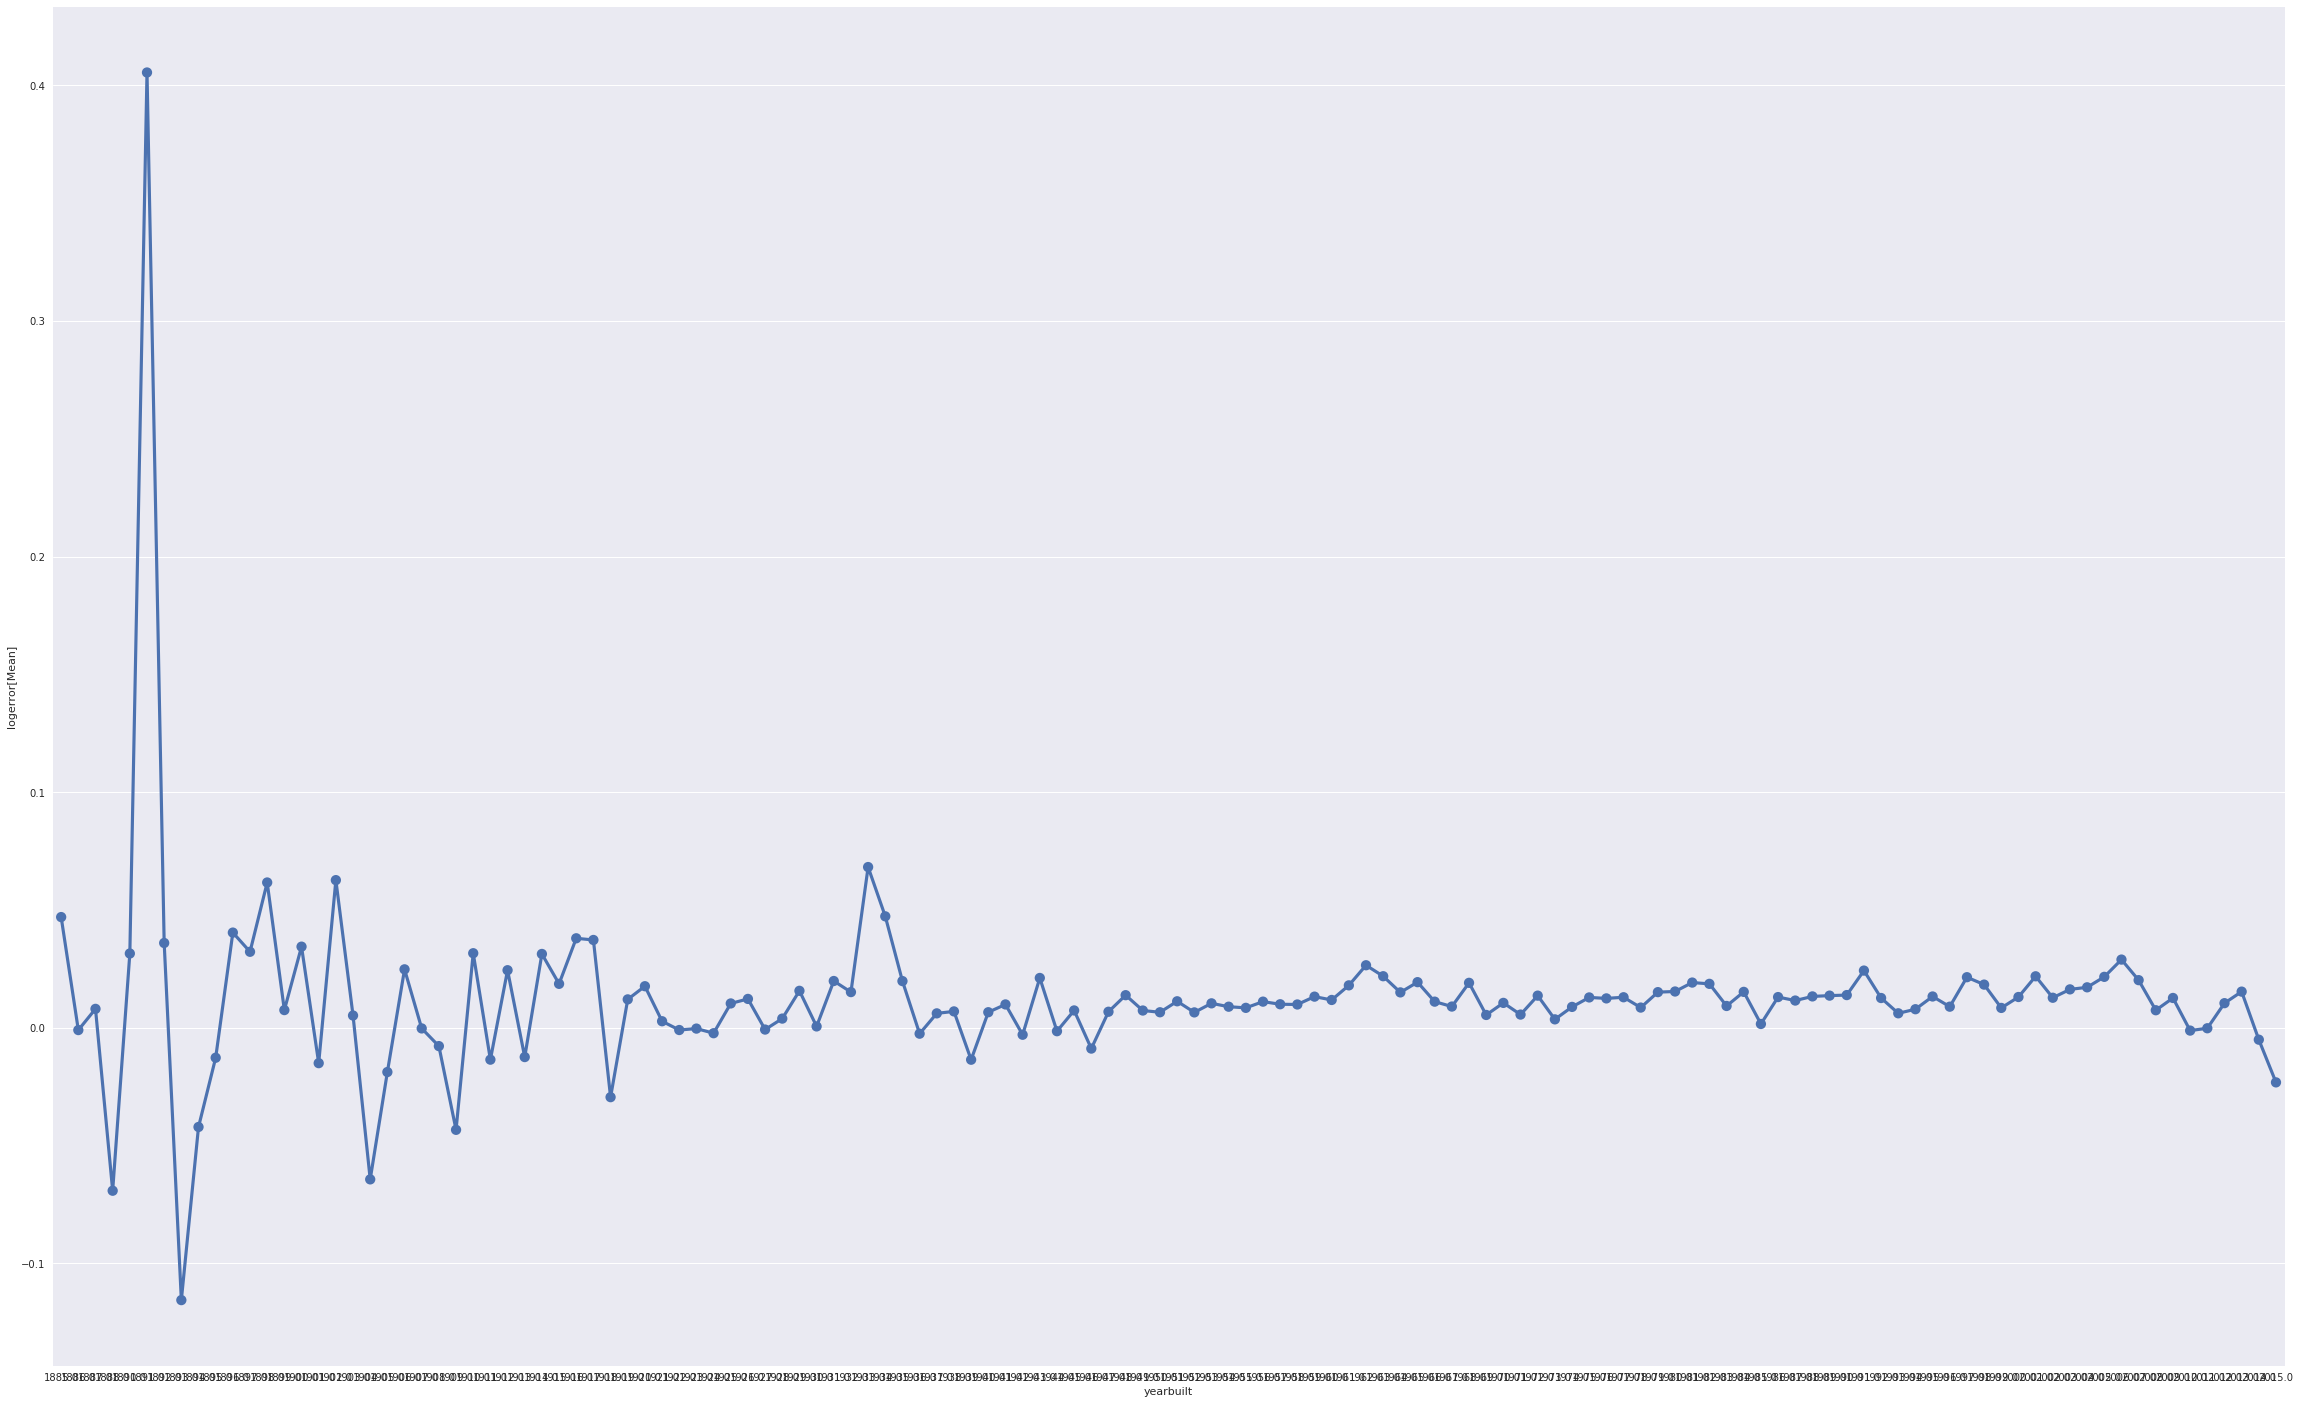

In [14]:
df_groupby_yearbuilt = df_merge_filtered_rows.groupby('yearbuilt')['logerror']
log_error_list = []
year_built_list = []
for name, group in df_groupby_yearbuilt:
    year_built_list.append(name)
    temp_list = []
    temp_list = group.tolist()
    log_error_list.append(np.mean(temp_list))
df_lineplot = pd.DataFrame(np.column_stack([year_built_list, log_error_list]), 
                               columns=['yearbuilt', 'logerror[Mean]'])
sns.set()
plt.figure(figsize=(40, 25))
ax = sns.pointplot(x="yearbuilt", y="logerror[Mean]", data=df_lineplot)

# Observation

Based on the above plot, it is evident that as the yearbuilt is coming close to the recent time, the variation in the logerror is getting minimize and therefore, the prediction of the price of the house by the estimation model is getting close to the actual price at which it is sold. So, this indicate that the model works better on houses that are built recently.

# 2.3  Histogram - Transaction Month vs Number of Transaction

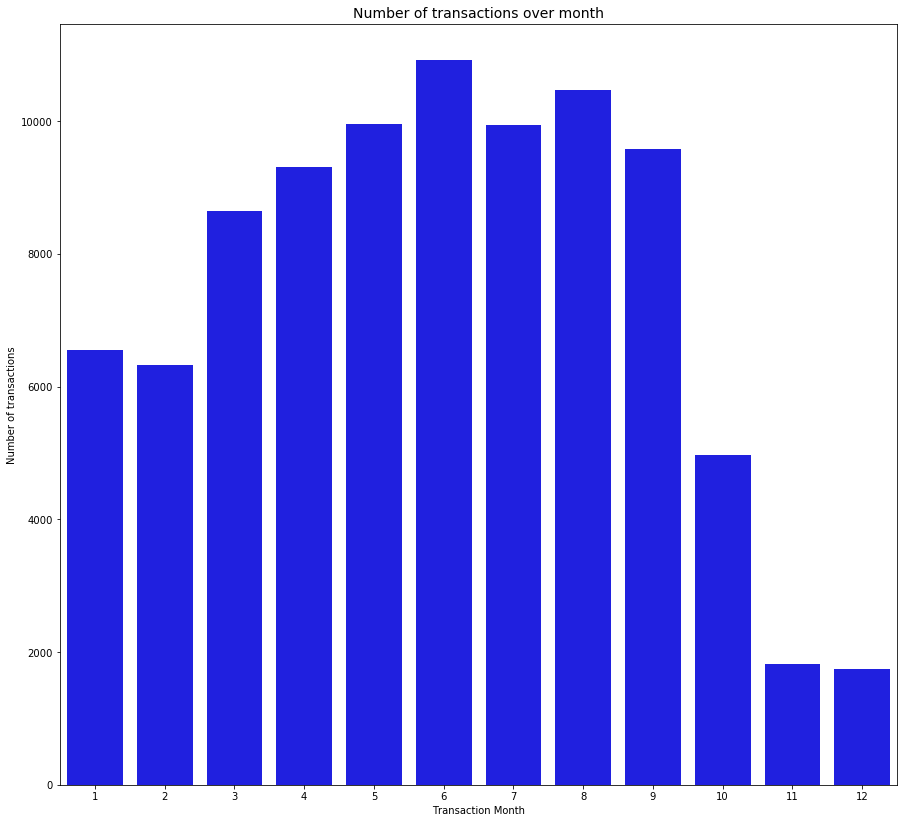

In [11]:
df_merge_filtered_rows_temp = df_merge_filtered_rows
df_merge_filtered_rows_temp['month_of_transaction'] = pd.to_datetime(df_merge_filtered_rows_temp['transactiondate']).dt.month
X = df_merge_filtered_rows_temp['month_of_transaction'].value_counts().index
Y = df_merge_filtered_rows_temp['month_of_transaction'].value_counts().values
plt.figure(figsize=(15,14))
sns.barplot(X, Y, color='b')
plt.xlabel('Transaction Month')
plt.ylabel('Number of transactions')
plt.title("Number of transactions over month", fontsize=14)
plt.show()

# Observation

From the above histogram, it is evident that the number of transactions first increase till the second quarter of the year and then starts decreasing with sudden steep slope in the last quarter of the year.From the given dataset, we can conclude that people generally does not buy houses in the last quarter of the year.

# 2.4 Scatter Plot - regionidcounty vs logerror

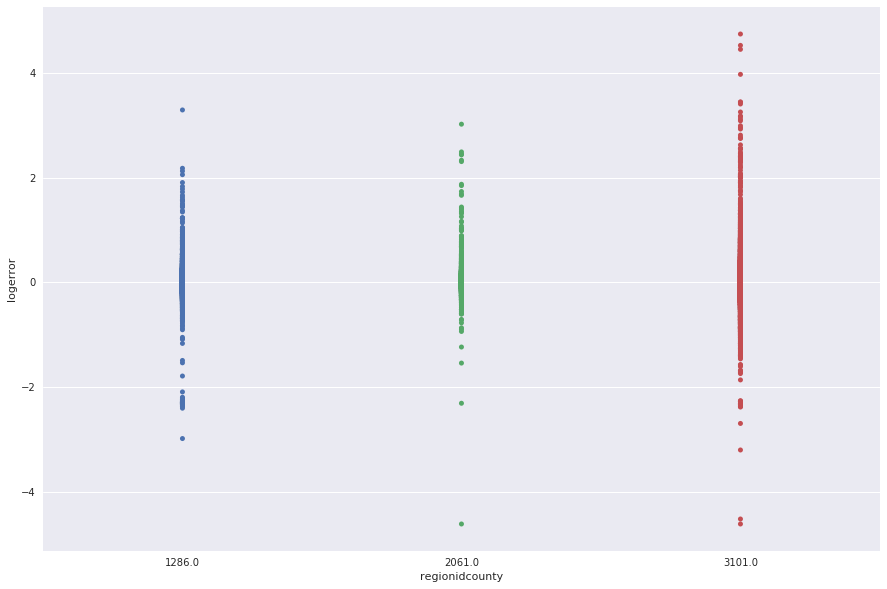

In [19]:
scatter = df_merge_filtered_rows.groupby('regionidcounty')['logerror']
log_error_list = []
region_id_county_list = []
for name, group in scatter:
    region_id_county_list.append(name)
    temp_list = []
    temp_list = group.tolist()
    log_error_list.append(temp_list)
scatterplotdf = pd.DataFrame(np.column_stack([region_id_county_list, log_error_list]), 
                               columns=['regionidcounty', 'logerror'])
sns.set()
plt.figure(figsize=(15, 10))
sns.stripplot(x="regionidcounty", y="logerror", data=df_merge_filtered_rows)

# Observation

From the above scatter plot, we can see that the logerror distribution around 0 is minimum for regionidcounty - 2061, whereas the logerror distribution around 0 is maximum for regionidcounty - 3101.
So, from this, we can conclude that the model prediction is good for houses located in regionidcounty-2061.


# 2.5 Scatter Plot - finishedsquarefeet12 vs roomcnt

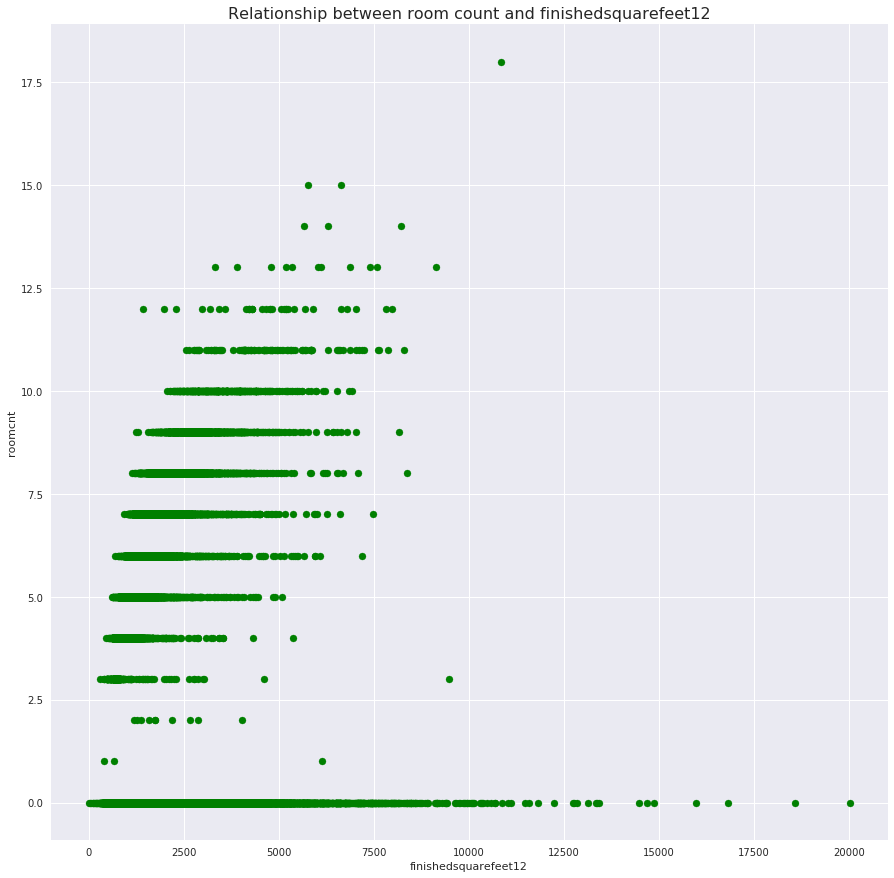

In [46]:
plt.figure(figsize=(15,15))
plt.scatter(df_merge_filtered_rows['finishedsquarefeet12'].fillna(df_merge_filtered_rows.mean()), df_merge_filtered_rows['roomcnt'].fillna(df_merge_filtered_rows.mean()),  color='green')
plt.xlabel("finishedsquarefeet12")
plt.ylabel("roomcnt")
plt.title("Relationship between room count and finishedsquarefeet12", fontsize=16)
plt.show()

# Observation

From the above plot, there are two interesting observations:
   - There are many houses that have roomcnt as zero inspite of having valid finishedsquarefeet12. This indicates that either the information about roomcnt is not observed correctly in the dataset or the complete house does not have a room in it[strange behaviour].
   - From the above plot, it can be observed that there is linear relationship between roomcnt and finishedsquarefeet12. As per my understanding and belief, as the finishedsquarefeet12 of a house increases, there should be an increase in the number of room counts. However, no such behaviour is observed from the above plot.

# Question 3 - Linear Regression

Based on the correlation between logerror and other features given in the dataset, I found below features that can provide better prediction for logerror:
finishedsquarefeet12, bathroomcnt, bedroomcnt, structuretaxvaluedollarcnt

Moreover, as per my understanding these features contribute a lot when people make decision to buy a particular house.

In [15]:
df_linear_reg = df_merge_filtered_rows[['bedroomcnt','finishedsquarefeet12','bathroomcnt', 'structuretaxvaluedollarcnt','logerror']]

#Taking non-Nan values for the desired columns
df_linear_reg_filtered = df_linear_reg[df_linear_reg.bathroomcnt.notnull()]
df_linear_reg_filtered = df_linear_reg_filtered[df_linear_reg_filtered.finishedsquarefeet12.notnull()]
df_linear_reg_filtered = df_linear_reg_filtered[df_linear_reg_filtered.structuretaxvaluedollarcnt.notnull()]
df_linear_reg_filtered = df_linear_reg_filtered[df_linear_reg_filtered.bedroomcnt.notnull()]

y = df_linear_reg_filtered['logerror'].as_matrix()
X = df_linear_reg_filtered.drop('logerror', axis=1)

#X_train, X_test, y_train, y_test = train_test_split(df_final_reg, y, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

lm = linear_model.LinearRegression()
model_linear = lm.fit(X_train, y_train)
predictions_linear = lm.predict(X_test)

print('Mean Squared Error with X_test, y_test:', np.mean(((y_test-predictions_linear) ** 2)))
print('R2 with X_test, y_test: ', r2_score(y_test, predictions_linear))
#Plot
# sns.set()
# plt.figure(figsize=(30, 20))
# plt.scatter(lm.predict(X_test), lm.predict(X_test)-y_test, c='g', s=40)
print(model_linear.coef_)
#plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, c='b', s=40, alpha=0.5)

Mean Squared Error with X_test, y_test: 0.0228193647024
R2 with X_test, y_test:  0.00259783513919
[  6.19544308e-05   9.22310706e-06  -2.88081116e-04  -1.55172132e-08]


# Analysis of Linear Regresssion

Linear Regression is a machine learning technique that is used for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. 

For the Linear Regression Model, I used multiple features [finishedsquarefeet12, bathroomcnt, bedroomcnt, structuretaxvaluedollarcnt] to estimate the logerror. Based on the dataset available, I used 70% of the given dataset for training the model and remaining 30% dataset for testing.While splitting the dataset for training and testing, I used random_state=4 so as to avoid the model to be biased. 

Based on the results, Mean Squared Error is: 0.022 and R2 is: 0.0025. As per the MSE value, the model perform reasonably well on the test dataset. However, as the R2 value is quite low, this means there is lot of variance in the values of the feature selected and therefore, we should proceed to make some better model that includes more features and provide better results.

As per the coefficient values associated with the model, feature -> "bedroomcnt" has the highest positive value. On the other hand, feature -> "bathroomcnt" has the highest negative value. Based on this, feature -> "bathroomcnt" contribute more towards the logerror prediction as it's absolute value is the highest among all features taken.

# Question 4

# Cleaning of data

In [14]:
# Removing features that have more than 60% Nan values[missing values]
df_filtered_dataset = df_merge_filtered_rows.dropna(thresh=0.4*len(df_merge_filtered_rows), axis=1)
print(df_filtered_dataset.isnull().sum())

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           32911
calculatedbathnbr                1182
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
fips                                0
fullbathcnt                      1182
heatingorsystemtypeid           34195
latitude                            0
longitude                           0
lotsizesquarefeet               10150
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31962
rawcensustractandblock              0
regionidcity                     1803
regionidcounty                      0
regionidzip                        35
roomcnt                             0
unitcnt                         31922
yearbuilt                         756
structuretaxvaluedollarcnt        380
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvalue

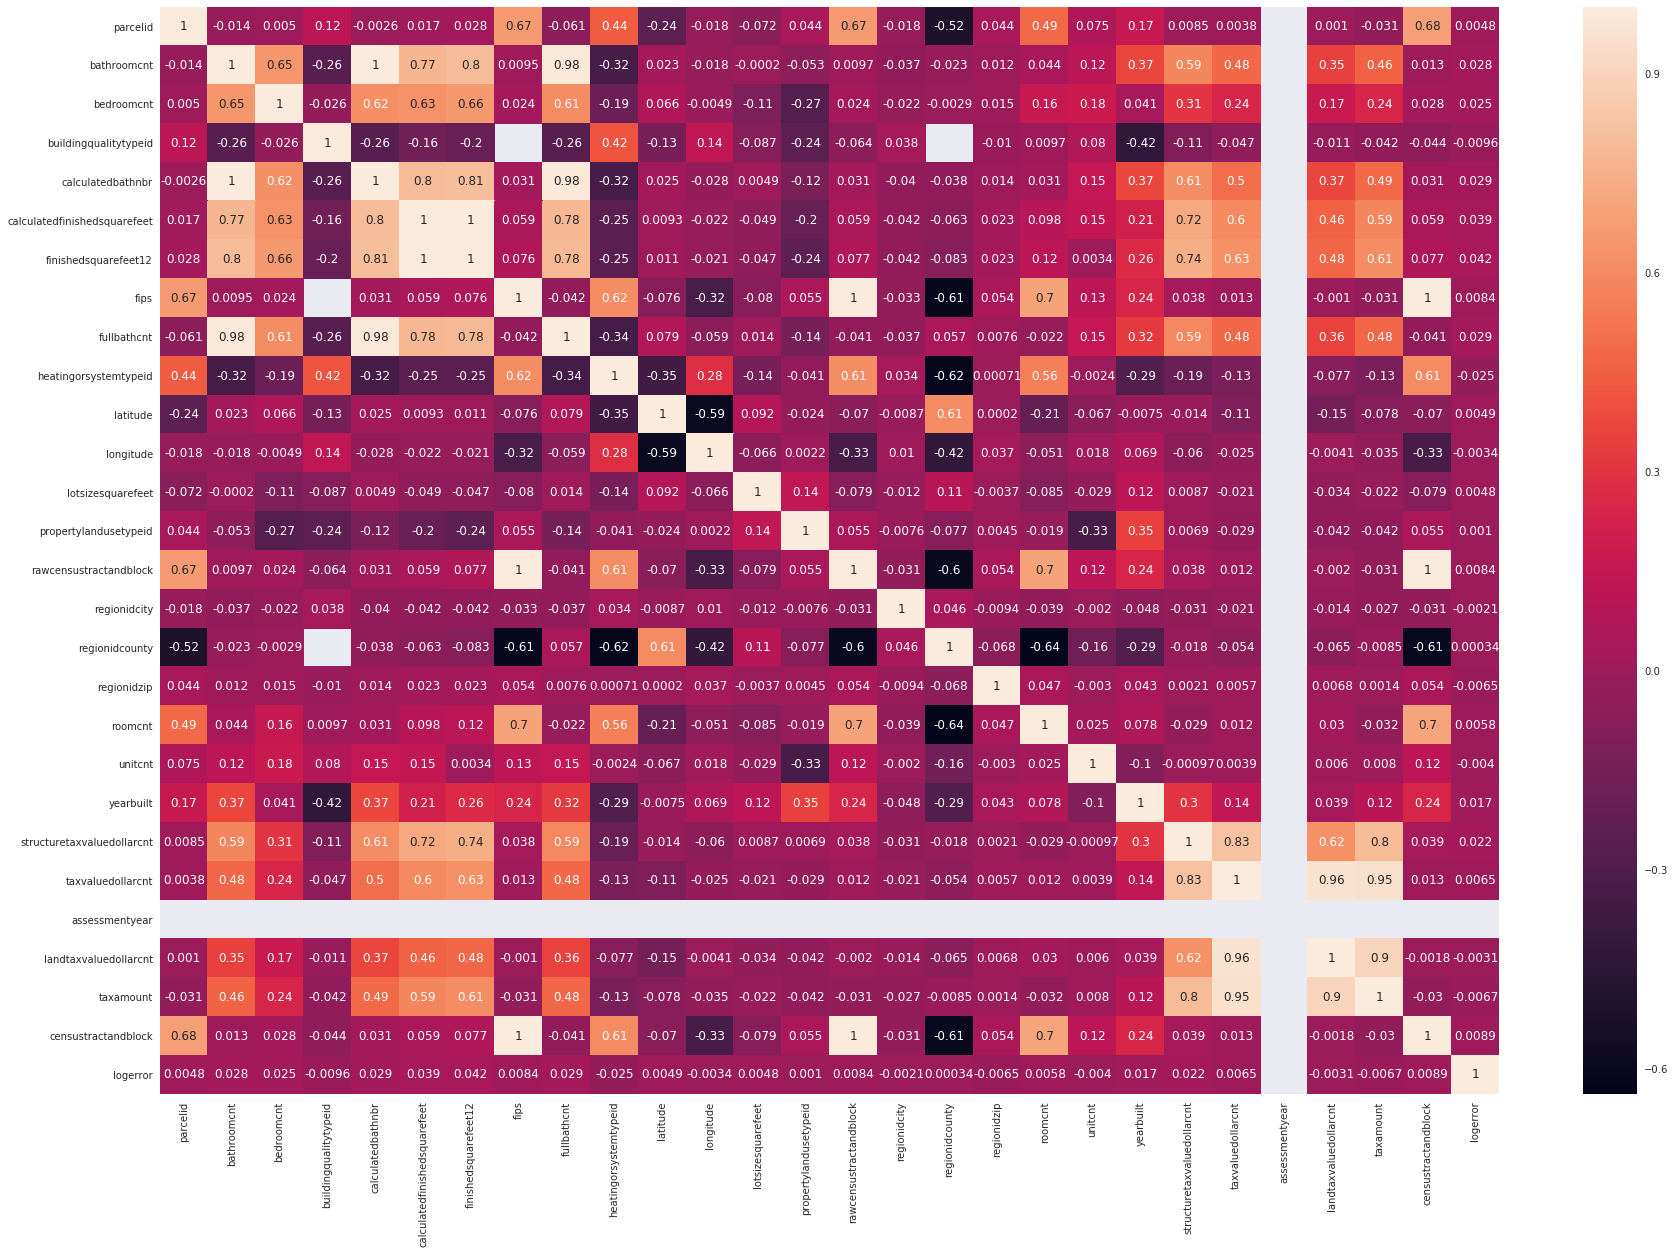

In [35]:
#to identify similar features and remove some of them
dataset_correlation_matrix = df_filtered_dataset.corr()
dataset_correlation_matrix
sns.set()
plt.figure(figsize=(30,20))
heatmap_vars = sns.heatmap(dataset_correlation_matrix, annot = True)

In [15]:
#removing similar features so as to avoid making the model bias
df_filtered_dataset.drop(['calculatedbathnbr', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'roomcnt'], axis=1, inplace=True)

#removing unwanted features based on correlation with logerror
df_filtered_dataset.drop(['fips', 'heatingorsystemtypeid', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc'], axis=1, inplace=True)

print(df_filtered_dataset.isnull().sum())

parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
buildingqualitytypeid         32911
finishedsquarefeet12           4679
latitude                          0
longitude                         0
lotsizesquarefeet             10150
rawcensustractandblock            0
regionidcity                   1803
regionidcounty                    0
regionidzip                      35
unitcnt                       31922
yearbuilt                       756
structuretaxvaluedollarcnt      380
taxvaluedollarcnt                 1
assessmentyear                    0
landtaxvaluedollarcnt             1
taxamount                         6
censustractandblock             605
logerror                          0
transactiondate                   0
dtype: int64


/home/vaibhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vaibhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
#Imputing missing values for certain columns based on Mode in a given regionidcounty

column = df_filtered_dataset.columns.difference(['parcelid','logerror', 'transactiondate', 'assessmentyear', 'finishedsquarefeet12', 'lotsizessquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])
column_list = list(column.values)
for colname in column_list:
    mode = df_filtered_dataset[colname].groupby([df_filtered_dataset['regionidcounty']]).apply(pd.Series.mode)
    df_filtered_dataset[colname].fillna( mode.iloc[0], inplace=True)

print(df_filtered_dataset.isnull().sum())

/home/vaibhav/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


parcelid                         0
bathroomcnt                      0
bedroomcnt                       0
buildingqualitytypeid            0
finishedsquarefeet12          4679
latitude                         0
longitude                        0
lotsizesquarefeet                0
rawcensustractandblock           0
regionidcity                     0
regionidcounty                   0
regionidzip                      0
unitcnt                          0
yearbuilt                        0
structuretaxvaluedollarcnt     380
taxvaluedollarcnt                1
assessmentyear                   0
landtaxvaluedollarcnt            1
taxamount                        6
censustractandblock              0
logerror                         0
transactiondate                  0
dtype: int64


In [17]:
#Imputing missing values of certain columns based on Mean value
column_list = ['finishedsquarefeet12', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
for colname in column_list:
    mean = df_filtered_dataset[colname].mean()
    print(mean)
    df_filtered_dataset[colname].fillna( mean, inplace=True)

1745.4545305855413
180093.39374826185
457672.627356714
278335.32502160093
5983.975926730042


/home/vaibhav/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


# In the data cleaning process, below steps have been taken:

  - Removing those columns having percentage of Nan values greater than 60% of the complete dataset.
  - Identifying similar features based on correlation between them and keeping only one of the feature in the final dataframe.
  - Dropping some features whose correlation with logerror is not significant based on the dataset values.
  - Imputing missing values of some of the features[groupby regionidcounty] by taking mode of the given values of the feature in a given regionidcounty.
  - Imputing missing values of the some of the features by taking mean value of the feature.

# Advance Models

# 4.1 Random Forest

In [40]:
#Random Forest
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
df_random_forest_reg = df_filtered_dataset[df_filtered_dataset.columns.difference(['parcelid', 'transactiondate', 'censustractandblock', 'rawcensustractandblock'])]

y_random_forest = df_random_forest_reg['logerror'].as_matrix()
X_random_forest = df_random_forest_reg.drop('logerror', axis=1)

X_train_random_forest, X_test_random_forest, y_train_random_forest, y_test_random_forest = train_test_split(X_random_forest, y_random_forest, test_size=0.3)

model_random_forest = RandomForestRegressor(n_estimators=20, criterion='mse', max_features=None)
# Train the model using the training sets and check score
model_random_forest.fit(X_train_random_forest, y_train_random_forest)
#Predict Output
predicted_random_forest = model_random_forest.predict(X_test_random_forest)
print('Mean Squared Error for Random Forest on the Test_Data from Training Data is: ', mean_squared_error(y_test_random_forest, predicted_random_forest))

Mean Squared Error for Random Forest on the Test_Data from Training Data is:  0.0268860871063


# 4.2 XGBRegressor

In [21]:
#XGBRegressor
from xgboost.sklearn import XGBRegressor
df_XBG_Regressor_reg = df_filtered_dataset[df_filtered_dataset.columns.difference(['parcelid', 'transactiondate', 'censustractandblock', 'rawcensustractandblock'])]

y_XBG_Regresssor = df_XBG_Regressor_reg['logerror'].as_matrix()
X_XBG_Regresssor = df_XBG_Regressor_reg.drop('logerror', axis=1)

X_train_XBG_Regresssor, X_test_XBG_Regresssor, y_train_XBG_Regresssor, y_test_XBG_Regressor = train_test_split(X_XBG_Regresssor, y_XBG_Regresssor, test_size=0.3)

expected_mean = np.mean(y_train_XBG_Regresssor)

model_xbg_regressor = XGBRegressor(n_estimators=100, objective='reg:linear', max_depth=5)#, base_score=expected_mean)
model_xbg_regressor.fit(X_train_XBG_Regresssor, y_train_XBG_Regresssor)

# #Make predictions for test data
predicted_xbg_regressor = model_xbg_regressor.predict(X_test_XBG_Regresssor)

print('Mean Squared Error for XBGRegressor on the Test_Data from Training Data is: ', mean_squared_error(y_test_XBG_Regressor, predicted_xbg_regressor))

Mean Squared Error for XBGRegressor on the Test_Data from Training Data is:  0.0265493724923


# 4.3 Gradient Boosting Regressor

In [22]:
#Gradient Boosting Regresssor
from sklearn.ensemble import GradientBoostingRegressor

df_gradient_boosting_reg = df_filtered_dataset[df_filtered_dataset.columns.difference(['parcelid', 'transactiondate', 'censustractandblock', 'rawcensustractandblock'])]

y_gradient_boosting_reg = df_gradient_boosting_reg['logerror'].as_matrix()
X_gradient_boosting_reg = df_gradient_boosting_reg.drop('logerror', axis=1)

X_train_gradient_boosting_reg, X_test_gradient_boosting_reg, y_train_gradient_boosting_reg, y_test_gradient_boosting_reg = train_test_split(X_gradient_boosting_reg, y_gradient_boosting_reg, test_size=0.3)

model_gradient_boosting_reg= GradientBoostingRegressor(n_estimators=100, max_depth=1)

# Train the model using the training sets and check score
model_gradient_boosting_reg.fit(X_train_gradient_boosting_reg, y_train_gradient_boosting_reg)

#Predict Output
predicted_gradient_boosting_reg= model_gradient_boosting_reg.predict(X_test_gradient_boosting_reg)

print('Mean Squared Error for Gradient Boosting Regressor on the Test_Data from Training Data is: ', mean_squared_error(y_test_gradient_boosting_reg, predicted_gradient_boosting_reg))

Mean Squared Error for Gradient Boosting Regressor on the Test_Data from Training Data is:  0.0246866421766


# Analysis of above Advance Models

In the Zillow challenge, we have to minimize the logerror feature. Based on my study and the problem requirement, I tried to build the below advance models that can incorporate more features and can make a model that minimises the logerror:

   a. Random Forest:
   
   Random forests is an ensemble learning method that works by creating multiple decision trees from the training data and predict an output on the testing data. Random decision forests also handles the problem of overfitting of data which generally occurs in decision tree. So, based on these reasons, I intend to use Random forest as it might create a better prediction model. Below are the parameters used in Random Forest:

      Parameter values that are tuned for the Random Forest:
      - n_estimators = 20 [the number of trees that will be created]
      - criterion = 'mse' [Mean Squared Error will be used for split while making decision]
      - max_features = None [All features will be used while making decision for a split]

      - MSE value on the training data set: 0.02688


   b. XGB Regressor:
    
   As the above Random Forest algorithm does not work as expected, I tried XGB Regressor. XGB Regressor is an advance boosting algorithm which has a high predictive power as it has both linear model and tree learning algorithms apart from the boosting algorithm properties. Below are the parameters that I tuned in XGB Regressor based on the output on the test data:

      Parameter values that are tuned for XGB Regressor:
      - n_estimators = 100 [number of boosting stages to perform]
      - objective = reg:linear [loss function to minimize]
      - max_depth = 5 [max depth of the tree]

      - MSE value on the training data set: 0.02654


   c. Gradient Boosting Regressor:
     
   As the XGB Regressor also did not perform well, I tried the simple Gradient Boosting Regressor method keeping in mind Prof. Skiena rule of Keep it Simple, Stupid. Gradient Boosting Regressor is a boosting algorithm which can be used to deal with plenty of data to make a prediction model. It is actually an ensemble of learning algorithms which combines the prediction of several base estimators in order to improve robustness over a single estimator. It combines multiple weak or average predictors to a build strong predicton. Below are the parameters that I tuned in Gradient Boosting based on the output on the test data. 
   
      Parameter values that are tuned for Gradient Boosting:
      - n_estimators=100 [number of boosting stages to perform]
      - max_depth = 1[max depth of the tree]

      - MSE value on the training data set: 0.02468


Based on the comparison of Mean Squared Error between different advance model created above, Gradient Boosting Regressor minimizes the MSE value on the training data set.

# Question 5

In [23]:
# Reading Sample Submission File

df_sample_submission = pd.read_csv("sample_submission.csv")
df_sample_submission.columns = ['parcelid' , '201610' , '201611' , '201612' , '201710' , '201711' , '201712']
df_sample_submission.shape

(2985217, 7)

In [24]:
#Merging the new sample submission file with properties_2016 file

df_to_be_predicted = pd.merge(df_properties, df_sample_submission, on='parcelid', how='left')

In [25]:
df_to_be_predicted.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [34]:
# Linear Regression Prediction on Sample

df_sample_submission_linear_reg = df_to_be_predicted[['finishedsquarefeet12', 'bathroomcnt', 'bedroomcnt', 'structuretaxvaluedollarcnt']]

In [35]:
column_list = ['finishedsquarefeet12', 'bathroomcnt', 'bedroomcnt', 'structuretaxvaluedollarcnt']
for colname in column_list:
    mean = df_sample_submission_linear_reg[colname].mean()
    df_sample_submission_linear_reg[colname].fillna( mean, inplace=True)

/home/vaibhav/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [36]:
print(df_sample_submission_linear_reg.isnull().sum())

finishedsquarefeet12          0
bathroomcnt                   0
bedroomcnt                    0
structuretaxvaluedollarcnt    0
dtype: int64


In [37]:
output_linear_reg = model_linear.predict(df_sample_submission_linear_reg)

In [38]:
result_df_linear_reg = pd.DataFrame(np.column_stack([output_linear_reg]), columns=['result'])

In [40]:
df_to_be_predicted['201610'] = result_df_linear_reg['result']
df_to_be_predicted['201611'] = result_df_linear_reg['result']
df_to_be_predicted['201612'] = result_df_linear_reg['result']
df_to_be_predicted['201710'] = result_df_linear_reg['result']
df_to_be_predicted['201711'] = result_df_linear_reg['result']
df_to_be_predicted['201712'] = result_df_linear_reg['result']

In [41]:
df_submission_csv_df = df_to_be_predicted[['parcelid', '201610', '201611', '201612', '201710', '201711', '201712']]
df_submission_csv_df.columns = ['ParcelId' , '201610' , '201611' , '201612' , '201710' , '201711' , '201712']
df_submission_csv_df.to_csv("sample_submission_linear_regression.csv", index=False)

# Based on the Linear Regression Model created on the training data set, sample_submission using linear regression scores: 0.0649048 on the Kaggle website. Rank on Kaggle: 2066

In [26]:
# Random Forest
df_filtered_dataset_temp = df_to_be_predicted

column = df_filtered_dataset_temp.columns.difference(['parcelid','logerror', 'transactiondate', 'finishedsquarefeet12', 'lotsizessquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])
column_list = list(column.values)
for colname in column_list:
    mode = df_filtered_dataset_temp[colname].groupby([df_filtered_dataset_temp['regionidcounty']]).apply(pd.Series.mode)
    df_filtered_dataset_temp[colname].fillna( mode.iloc[0], inplace=True)

column_list = ['finishedsquarefeet12', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
for colname in column_list:
    mean = df_filtered_dataset_temp[colname].mean()
    df_filtered_dataset_temp[colname].fillna( mean, inplace=True)
    
#df_filtered_dataset[df_filtered_dataset.columns.difference(['parcelid', 'transactiondate', 'censustractandblock', 'rawcensustractandblock'])]

df_desired_cols = df_filtered_dataset_temp[['assessmentyear', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'finishedsquarefeet12', 'landtaxvaluedollarcnt', 'latitude',
       'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidcounty',
       'regionidzip', 'structuretaxvaluedollarcnt', 'taxamount',
       'taxvaluedollarcnt', 'unitcnt', 'yearbuilt']]

sample_predict_random_forest = model_random_forest.predict(df_desired_cols)

In [27]:
result_df_random_forest = pd.DataFrame(np.column_stack([sample_predict_random_forest]), columns=['result'])
df_to_be_predicted['201610'] = result_df_random_forest['result']
df_to_be_predicted['201611'] = result_df_random_forest['result']
df_to_be_predicted['201612'] = result_df_random_forest['result']
df_to_be_predicted['201710'] = result_df_random_forest['result']
df_to_be_predicted['201711'] = result_df_random_forest['result']
df_to_be_predicted['201712'] = result_df_random_forest['result']
df_submission_csv_df = df_to_be_predicted[['parcelid', '201610', '201611', '201612', '201710', '201711', '201712']]
df_submission_csv_df.columns = ['ParcelId' , '201610' , '201611' , '201612' , '201710' , '201711' , '201712']
df_submission_csv_df.to_csv("sample_submission_random_forest.csv", index=False)

# Based on the Random Forest Model created on the training data set, sample_submission using random forest scores: 0.0842135 on the Kaggle website.

In [30]:
# XGBRegressor
df_filtered_dataset_temp = df_to_be_predicted

column = df_filtered_dataset_temp.columns.difference(['parcelid','logerror', 'transactiondate', 'finishedsquarefeet12', 'lotsizessquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])
column_list = list(column.values)
for colname in column_list:
    mode = df_filtered_dataset_temp[colname].groupby([df_filtered_dataset_temp['regionidcounty']]).apply(pd.Series.mode)
    df_filtered_dataset_temp[colname].fillna( mode.iloc[0], inplace=True)

column_list = ['finishedsquarefeet12', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
for colname in column_list:
    mean = df_filtered_dataset_temp[colname].mean()
    df_filtered_dataset_temp[colname].fillna( mean, inplace=True)
    
#df_filtered_dataset[df_filtered_dataset.columns.difference(['parcelid', 'transactiondate', 'censustractandblock', 'rawcensustractandblock'])]

df_desired_cols = df_filtered_dataset_temp[['assessmentyear', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'finishedsquarefeet12', 'landtaxvaluedollarcnt', 'latitude',
       'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidcounty',
       'regionidzip', 'structuretaxvaluedollarcnt', 'taxamount',
       'taxvaluedollarcnt', 'unitcnt', 'yearbuilt']]

sample_predict_xgb_regressor = model_xbg_regressor.predict(df_desired_cols)

In [31]:
result_df_xbg_regressor = pd.DataFrame(np.column_stack([sample_predict_xgb_regressor]), columns=['result'])
df_to_be_predicted['201610'] = result_df_xbg_regressor['result']
df_to_be_predicted['201611'] = result_df_xbg_regressor['result']
df_to_be_predicted['201612'] = result_df_xbg_regressor['result']
df_to_be_predicted['201710'] = result_df_xbg_regressor['result']
df_to_be_predicted['201711'] = result_df_xbg_regressor['result']
df_to_be_predicted['201712'] = result_df_xbg_regressor['result']
df_submission_csv_df = df_to_be_predicted[['parcelid', '201610', '201611', '201612', '201710', '201711', '201712']]
df_submission_csv_df.columns = ['ParcelId' , '201610' , '201611' , '201612' , '201710' , '201711' , '201712']
df_submission_csv_df.to_csv("sample_submission_xbg_regressor.csv", index=False)

# Based on the XGB Regressor Model created on the training data set, sample_submission using random forest scores: 0.0668719 on the Kaggle website.

In [ ]:
# Gradient Boosting Regressor
df_filtered_dataset_temp = df_to_be_predicted

column = df_filtered_dataset_temp.columns.difference(['parcelid','logerror', 'transactiondate', 'finishedsquarefeet12', 'lotsizessquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])
column_list = list(column.values)
for colname in column_list:
    mode = df_filtered_dataset_temp[colname].groupby([df_filtered_dataset_temp['regionidcounty']]).apply(pd.Series.mode)
    df_filtered_dataset_temp[colname].fillna( mode.iloc[0], inplace=True)

column_list = ['finishedsquarefeet12', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
for colname in column_list:
    mean = df_filtered_dataset_temp[colname].mean()
    df_filtered_dataset_temp[colname].fillna( mean, inplace=True)
    
#df_filtered_dataset[df_filtered_dataset.columns.difference(['parcelid', 'transactiondate', 'censustractandblock', 'rawcensustractandblock'])]

df_desired_cols = df_filtered_dataset_temp[['assessmentyear', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'finishedsquarefeet12', 'landtaxvaluedollarcnt', 'latitude',
       'longitude', 'lotsizesquarefeet', 'regionidcity', 'regionidcounty',
       'regionidzip', 'structuretaxvaluedollarcnt', 'taxamount',
       'taxvaluedollarcnt', 'unitcnt', 'yearbuilt']]

sample_predict_gradient_boosting_reg = model_gradient_boosting_reg.predict(df_desired_cols)

In [49]:
result_df_gradient_boosting_reg = pd.DataFrame(np.column_stack([sample_predict_gradient_boosting_reg]), columns=['result'])
df_to_be_predicted['201610'] = result_df_gradient_boosting_reg['result']
df_to_be_predicted['201611'] = result_df_gradient_boosting_reg['result']
df_to_be_predicted['201612'] = result_df_gradient_boosting_reg['result']
df_to_be_predicted['201710'] = result_df_gradient_boosting_reg['result']
df_to_be_predicted['201711'] = result_df_gradient_boosting_reg['result']
df_to_be_predicted['201712'] = result_df_gradient_boosting_reg['result']
df_submission_csv_df = df_to_be_predicted[['parcelid', '201610', '201611', '201612', '201710', '201711', '201712']]
df_submission_csv_df.columns = ['ParcelId' , '201610' , '201611' , '201612' , '201710' , '201711' , '201712']
df_submission_csv_df.to_csv("sample_submission_gradient_boosting_reg.csv", index=False)

# Based on the Gradient Boosting Model created on the training data set, sample_submission using random forest scores: 0.0658005 on the Kaggle website.

# Question 6

My favourite model from the list of models that I read and used in the above task was Gradient Boosting Regresssor.

# What is Gradient Boosting Regessor

Gradient boosting Regresssor is a machine learning technique for regression problems, which produces a final prediction model by employing multiple weak learning algorithms such as decision trees. It builds the model in an iterative fashion [stage-wise model], also called boosting, and then it generalizes them by allowing optimization of a loss function.


# How Gradient Boosting Regressor works

Gradient boosting regressor involves three elements while making the final prediction model:

   - A loss function to be optimized.
   - A weak learner.
   - An additive model to add weak learners

a. Loss Function to be optimized

The loss function is the main key that needs to be optimized in every iteration. The loss function must be differentiable. In our case, mean squared error is used a loss function. In every iteration, the gradient boosting algorithm tries to create a better prediction model by minimizing the loss function from the model in the previous iteration.

b. Weak Learner

In Gradient boosting, decision trees are used as the weak learner model. Regression trees that are used in the gradient boosting regressor outputs real values for splits and also allows the output to be added together. This property allows the subsequent model outputs to be added and thereby, “correcting” the residuals in the predictions.

In this model, trees are constructed in a greedy manner by choosing the best split on the basis of loss that is to be minimized. Moreover, the decision trees used are constrained in various ways so that the learner remain weak and can be constructed in a greedy manner.

c. Additive Model

In order to reach to the final predictive model, decision trees created are added one a time in the model and existing trees are not changed. The process is to minimize the loss function while adding a new decision tree to the model. After the loss has been calculated for a certain stage in the model, new decision tree should be added to the model that reduces the loss and thereby follow the gradient. The output for the new tree is then added to the output of the existing sequence of trees in the model after it has improve the final output.

    Reference - https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/


# Evaluation of Gradient Boosting Regressor in the given data set

The gradient boosting regressor is a very powerful technique for solving regression problems that require minimization of the error in the final model. In the Zillow challenge, our goal is to make a prediction model that minimizes the logerror and therefore, gradient boosting regressor is a good choice to use.

The Gradient boosting regressor have the capability to make a model by incorporating large number of features, which is the case in Zillow challenge. Also, the regressor tries to make a good decision[by using various features] while splitting up in the decision tree. At each iteration or the boosting stage, the regressor tries to minimize the loss by creating a decision tree and adding it to the model. These qualities of Gradient Boosting Regressor help me think that the predictive model using it should be good.

In the Zillow challenge, I have used "Mean Square Error" as the loss function that is to be minimized and therefore, while creating an additive model, it always makes the best decision so as to minimize the MSE which can be shown from the MSE value[0.02468] we get on the test dataset.

# Limitations of Gradient Boosting Regressor

  - Gradient Boosting Regressor takes long time to create a model as it creates the decision tree sequentially.
  - Gradient Boosting Regresssor are prone to overfitting of data if the tree creation constraints are not provided.

In our case, overfitting of data has been avoided by providing n_estimator and max_depth parameters to the model which will put a constrain on the decision tree creation.

# Interesting Experience

   - The Zillow challenge provides an insight in to the Real Estate market. After studying the dataset and finding correlations between different features, I got some understanding as on what features the price of a house depends in U.S.
   - In my case, Linear regresssion model works better [in the dataset] than the other advance models[Random Forest, Gradient Boosting, XGB Regressor] created which comes to me as a surprise. Moreover, the linear regression model also provides the best score in the Zillow challenge which gives a better indication of how good it works on unseen dataset.
   - In my case, XGB Regressor does not work well when compared to Gradient Boosting model. This comes to me as a surprise because XGB Regressor is an Extreme Boosting method which cater many limitations of the Gradient boosting and therefore, should have provided better result when compared to Gradient Boosting.
   - I came to understand that, it is not neccessary that complex models which can incorporate a large number of features always works better than a simple model that can cater fewer features if selected properly. This was the case of how linear regression proves to be a better prediction model than other advance model in my case. Also, Gradient Boosting regresssor works well when compared to XGB Regressor[an advance boosting method].